In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
Matr = TL
normal = np.max(Matr)
MatrixL = np.array(Matr)/normal
print(MatrixL)
MatrixR = MatrixL.transpose()
MatrixR = MatrixR/np.max(MatrixR)
print(MatrixR)
Linex = np.arange(0,384,1)
frameIndex = 30

[[  1.10965926e-07   2.30716655e-05  -4.17971655e-03]
 [  1.72479646e-05  -1.04010453e-06   6.90059302e-02]
 [ -3.46818776e-03  -7.40385968e-02   1.00000000e+00]]
[[  1.10965926e-07   1.72479646e-05  -3.46818776e-03]
 [  2.30716655e-05  -1.04010453e-06  -7.40385968e-02]
 [ -4.17971655e-03   6.90059302e-02   1.00000000e+00]]


In [2]:
###################################
#Locate Features; single frame test
###################################
print(np.max(FrameL[frameIndex]))
fL = tp.locate(FrameL[frameIndex], 3, minmass=10) 
fL.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,245.082456,17.017544,150.799061,0.847080,0.366748,42.594121,375.0,0.000095,30
1,217.153285,19.120438,144.978746,0.852219,0.371859,39.683963,329.0,0.000108,30
2,227.972158,18.839907,114.025255,0.846722,0.313916,32.276290,288.0,0.000123,30
3,224.943445,25.961440,102.913745,0.837735,0.450549,30.688932,269.0,0.000132,30
4,216.066815,27.126949,118.787330,0.845531,0.345794,33.863649,296.0,0.000120,30


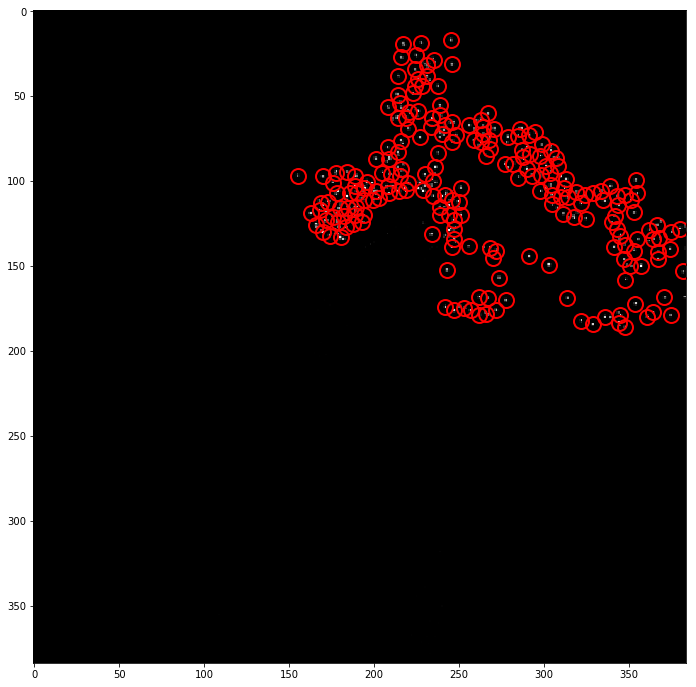

In [3]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure(figsize = (12,12))  # make a new figure
#plt.plot(ipL[0], ipL[1],'o')
tp.annotate(fL, FrameL[frameIndex]);

In [4]:
print(np.max(FrameR[frameIndex]))
fR = tp.locate(FrameR[frameIndex], 3, minmass=10) 
fR.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,234.976577,5.996396,144.071562,0.845763,0.350126,41.014967,362.0,0.000329,30
1,210.967532,9.876623,119.929841,0.845154,0.339394,34.265669,300.0,0.000397,30
2,204.941278,11.139896,150.301683,0.848650,0.309353,42.053321,384.0,0.000311,30
3,198.857605,18.029126,80.212815,0.838013,0.493088,23.882133,208.0,0.000573,30
4,214.905830,19.959641,115.776426,0.862783,0.126506,29.593078,287.0,0.000415,30


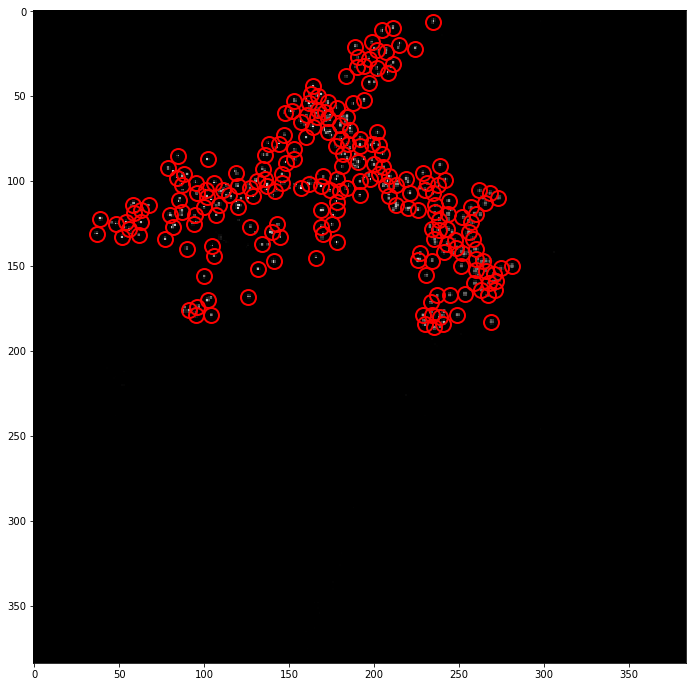

217


In [5]:
plt.figure(figsize = (12,12))  # make a new figure
#plt.plot(ipR[0], ipR[1],'o')
tp.annotate(fR, FrameR[frameIndex]);
print(len(fR))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


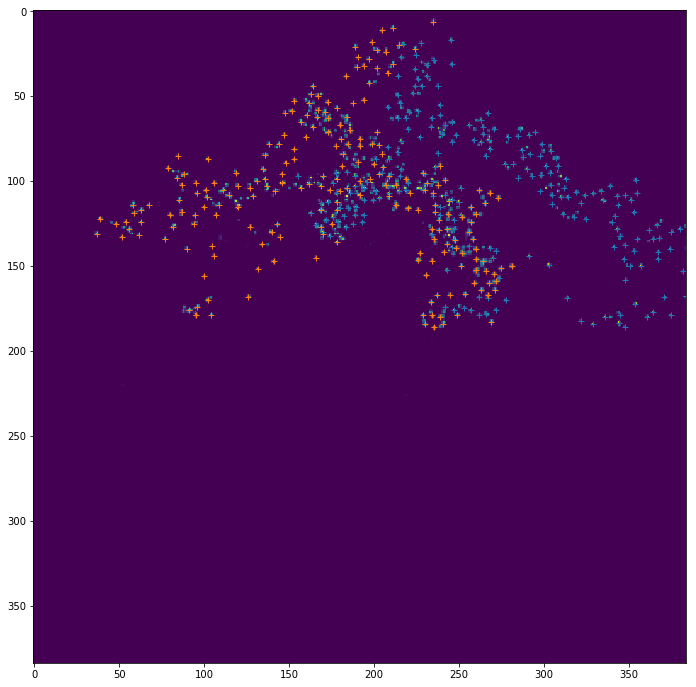

In [6]:
plt.figure(figsize = (12,12))
T0 = (fL['x'].iloc[0],fL['y'].iloc[0])
T1 = (fR['x'].iloc[0],fR['y'].iloc[0])

theta = math.pi*20./180.
fLx = np.array(fL['x']-T0[0])
fLy = np.array(fL['y']-T0[1])
fLr = np.sqrt(np.power(fLx,2)+np.power(fLy,2))
fLtheta = np.arccos(fLx/fLr)
fLtheta_rot = fLtheta + theta
fLx_rot = fLr*np.cos(fLtheta_rot)*1.
fLy_rot = fLr*np.sin(fLtheta_rot)*1.
#print(fLr, fLr, fLtheta_rot,fLx_rot)
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.plot(fL['x'],fL['y'],'+')
plt.plot(fR['x'],fR['y'],'+')
#plt.plot(fL['x']-T0[0],fL['y']-T0[1],'o')
#plt.plot(fLx_rot+T1[0],fLy_rot+T1[1],'+')
plt.show()


(0, 245.08245614035087, 17.017543859649123, 234.97657657657658, 5.9963963963963964, 0.002584148824632477, 0.002761092475162989)
(1, 217.15328467153284, 19.12043795620438, 210.96753246753246, 9.8766233766233764, 1.0008542051191656, 1.0533013995728762)
(2, 227.97215777262181, 18.839907192575406, 204.9412780656304, 11.139896373056995, 0.801230231911216, 0.8450306338210182)
(3, 224.94344473007712, 25.961439588688947, 198.85760517799352, 18.029126213592232, 0.19108626875072748, 0.20098909164242362)
(4, 216.06681514476614, 27.126948775055681, 214.90582959641256, 19.95964125560538, 0.6822147640453492, 0.7181266554011174)
(5, 235.13742690058479, 28.92982456140351, 189.08421052631579, 20.863157894736844, 0.34422986419805784, 0.362428369211952)
(6, 245.94117647058823, 31.113725490196078, 224.08407079646017, 21.904867256637168, 0.41059956142923953, 0.43747679679274215)
(7, 231.12786259541986, 31.841603053435115, 201.98895027624309, 23.044198895027623, 0.8648186679988733, 0.9120370442910053)
(8, 2

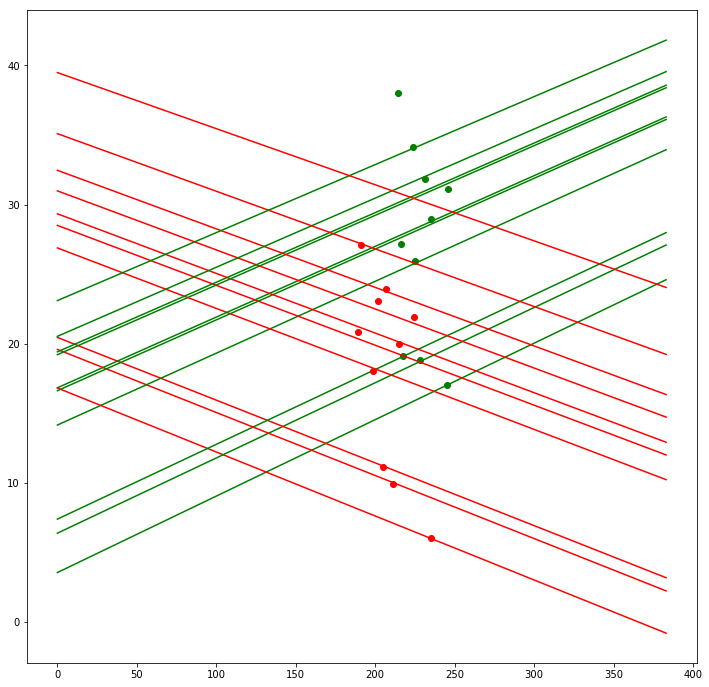

In [7]:
plt.figure(figsize=(12,12))
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
#for ii in range(230,len(fL)):
for ii in range(0,10):
    xL = fL['x'].iloc[ii]
    yL = fL['y'].iloc[ii]
    xR = fR['x'].iloc[ii]
    yR = fR['y'].iloc[ii]   
    ipL_i = [xL,yL,1]
    ipR_i = [xR,yR,1]
    LineR = np.dot(ipL_i,MatrixL) 
    LineL = np.dot(ipR_i,MatrixR) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyL,color='g')
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyR,color='r')
    dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    #FF = dlr + drl
    print(ii,xL,yL,xR,yR,dlr,drl)
plt.show()

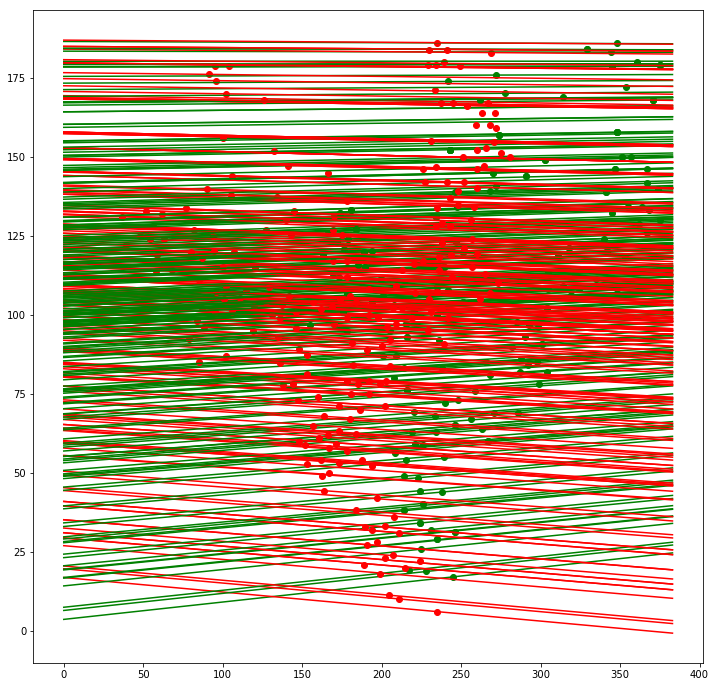

In [8]:
plt.figure(figsize=(12,12))
pairR = []
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for ir in range(0,len(fR)):
#for ir in range(10,13):
    Min = 10000
    MinIndex = 0
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixR)
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for il in range(0,len(fL)):
        xL = fL['x'].iloc[il]
        yL = fL['y'].iloc[il]
        ipL_i = [xL,yL,1]
        LineR = np.dot(ipL_i,MatrixL) 
        #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
        #plt.plot(xL,yL,'o',color='g')
        #plt.plot(Linex,LineyL,color='g')
        #plt.plot(xR,yR,'o',color='r')
        #plt.plot(Linex,LineyR,color='r')
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        #plt.plot(xL,yL,'o',color='g')
        #print(ir,xR,yR,il,xL,yL,dlr,drl)        
        if(FF<Min):
            Min = FF
            MinIndex = il
    xL = fL['x'].iloc[MinIndex]
    yL = fL['y'].iloc[MinIndex] 
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixL) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1] 
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
    ipair = [ir,MinIndex,Min]
    pairR.append(ipair)
plt.show()


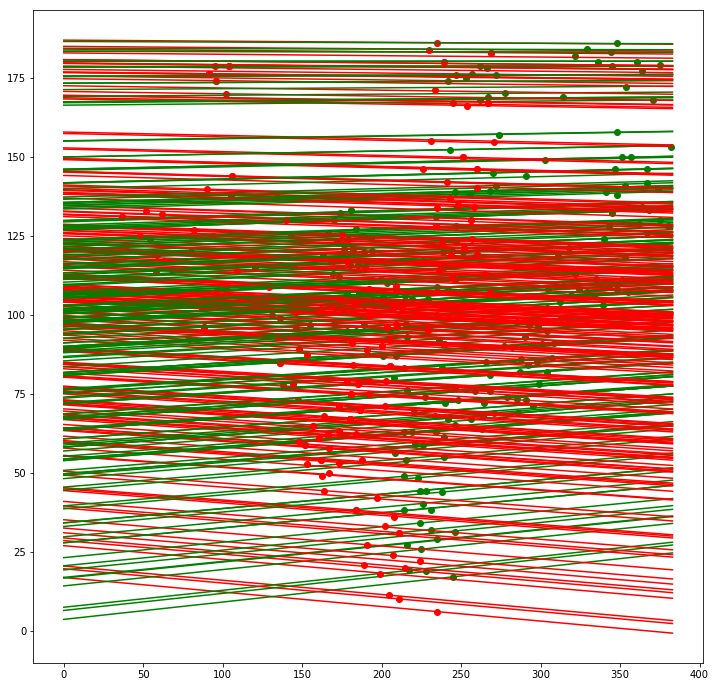

In [9]:
plt.figure(figsize=(12,12))
pairL = []
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for il in range(0,len(fL)):
#for il in range(10,13):
    Min = 10000
    MinIndex = 0
    xL = fL['x'].iloc[il]
    yL = fL['y'].iloc[il]
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixL)
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for ir in range(0,len(fR)):
        xR = fR['x'].iloc[ir]
        yR = fR['y'].iloc[ir]
        ipR_i = [xR,yR,1]
        LineL = np.dot(ipR_i,MatrixR) 
        LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl     
        if(FF<Min):
            Min = FF
            MinIndex = ir
    xR = fR['x'].iloc[MinIndex]
    yR = fR['y'].iloc[MinIndex] 
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixR) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1] 
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    ipair = [MinIndex,il,Min]
    pairL.append(ipair)
plt.show()

In [10]:
for ir in range(len(pairR)):
    print(pairR[ir])

[0, 0, 0.005345241299795466]
[1, 2, 0.2805653590620045]
[2, 1, 0.12263592762595801]
[3, 3, 0.3920753603931511]
[4, 5, 0.30913502356349304]
[5, 5, 0.7066582334100098]
[6, 6, 0.8480763582219817]
[7, 6, 1.2407962251052822]
[8, 7, 0.33956581578690703]
[9, 8, 0.15808842903287074]
[10, 8, 1.957857470330949]
[11, 9, 0.16364180844773563]
[12, 9, 0.5606908536673775]
[13, 11, 0.7567696473703587]
[14, 11, 0.5534753709072375]
[15, 14, 0.23218396109997158]
[16, 12, 0.07112704502957165]
[17, 15, 0.40372698753122277]
[18, 16, 0.3474072896668623]
[19, 17, 0.8792996696570254]
[20, 18, 0.7101446961277277]
[21, 22, 0.8157327406753028]
[22, 19, 1.0477923404776845]
[23, 22, 0.17009635243818588]
[24, 21, 0.11647369372450331]
[25, 20, 1.1885645139312289]
[26, 27, 0.7351252368258255]
[27, 26, 0.01892279018740495]
[28, 25, 0.11743829453341971]
[29, 28, 0.8899516659379771]
[30, 28, 0.7227908264320022]
[31, 30, 0.7385319961255739]
[32, 35, 0.0836050366549218]
[33, 34, 0.09609034631159574]
[34, 31, 0.358759575591

In [11]:
for i1 in range(len(pairL)):
    print(pairL[i1])

[0, 0, 0.005345241299795466]
[2, 1, 0.12263592762595801]
[1, 2, 0.2805653590620045]
[3, 3, 0.3920753603931511]
[5, 4, 0.9961881559632944]
[4, 5, 0.30913502356349304]
[6, 6, 0.8480763582219817]
[8, 7, 0.33956581578690703]
[9, 8, 0.15808842903287074]
[11, 9, 0.16364180844773563]
[11, 10, 1.2725672903869607]
[14, 11, 0.5534753709072375]
[16, 12, 0.07112704502957165]
[16, 13, 0.8525637838060449]
[15, 14, 0.23218396109997158]
[17, 15, 0.40372698753122277]
[18, 16, 0.3474072896668623]
[19, 17, 0.8792996696570254]
[20, 18, 0.7101446961277277]
[22, 19, 1.0477923404776845]
[24, 20, 0.8988951185748209]
[24, 21, 0.11647369372450331]
[23, 22, 0.17009635243818588]
[25, 23, 1.679787782091844]
[28, 24, 0.3217647207906575]
[28, 25, 0.11743829453341971]
[27, 26, 0.01892279018740495]
[27, 27, 0.6247004091145322]
[30, 28, 0.7227908264320022]
[32, 29, 0.3745588639033024]
[31, 30, 0.7385319961255739]
[34, 31, 0.3587595755913079]
[32, 32, 0.5351751428187981]
[35, 33, 0.36259819594446474]
[33, 34, 0.09609034

In [12]:
pair=[]
for ir in range(len(pairR)):
    for il in range(len(pairL)):
        RR = pairR[ir][0]
        RL = pairR[ir][1]
        LR = pairL[il][0]
        LL = pairL[il][1]
        if(RR == LR and RL == LL):
            ipair = [RR,RL]
            pair.append(ipair)
            

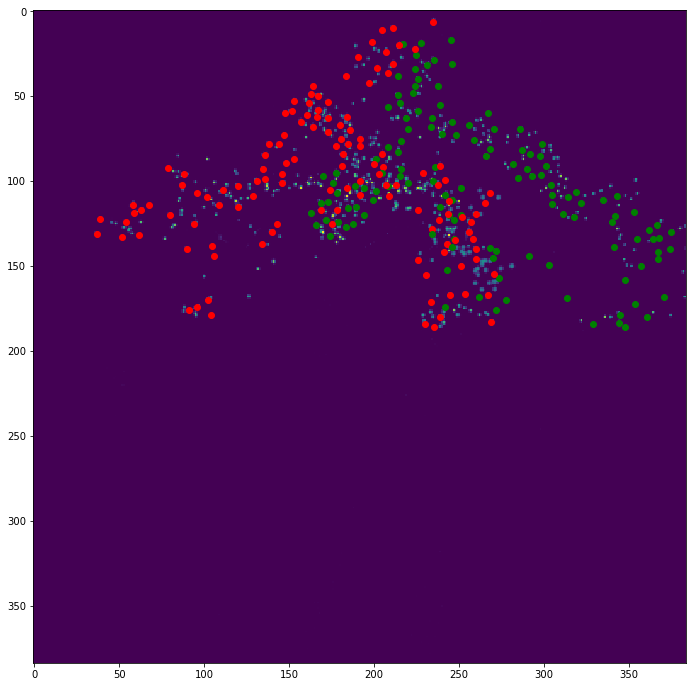

In [13]:
plt.figure(figsize=(12,12))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
Data = []
for i in range(len(pair)):
    ir = pair[i][0]
    il = pair[i][1]
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    xL = fL['x'].iloc[il]
    yL = fL['y'].iloc[il]
    massR = fR['mass'].iloc[ir]
    massL = fL['mass'].iloc[il]
    idata = [ir,il,massR,xR,yR,massL,xL,yL]
    Data.append(idata)
    #df = pd.DataFrame(data)
    ipR = [xR,yR,1]
    ipL = [xL,yL,1]
    LineR = np.dot(ipL,MatrixL) 
    LineL = np.dot(ipR,MatrixR) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    #plt.plot(Linex,LineyR,color='r')
    #plt.plot(Linex,LineyL,color='g')    
    plt.plot(xR,yR,'o',color='r')
    plt.plot(xL,yL,'o',color='g')
plt.show()

In [14]:
df = pd.DataFrame(Data)
df.columns = ['PID_R','PID_L', 'Mass_R','X_R','Y_R','Mass_L','X_L','Y_L']
df.head()

,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,0,0,144.071562,234.976577,5.996396,150.799061,245.082456,17.017544
1,1,2,119.929841,210.967532,9.876623,114.025255,227.972158,18.839907
2,2,1,150.301683,204.941278,11.139896,144.978746,217.153285,19.120438
3,3,3,80.212815,198.857605,18.029126,102.913745,224.943445,25.961440
4,4,5,115.776426,214.905830,19.959641,90.479436,235.137427,28.929825


In [15]:
df.to_csv("PointPair_Frame_{}.csv".format(frameIndex))